# **Movie Genre Classification**

### **1. Import Pandas, Matplotlib, Seaborn, plotly, sklearn, pickle , nltk**

In [2]:

import pandas as pd
import numpy as np
import re
import nltk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


**Download stopwords**


In [ ]:

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **2. Importing CSV file into Python as a Pandas Dataframe.**


In [3]:

df = pd.read_csv("G:\\Final_Projects\\NLP\\Project2\\Movie\\Dataset\\kaggle_movie_train.csv")


In [4]:
df.head()

,id,text,genre
0,0.0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2.0,"t, summa cum laude and all. And I'm about to l...",comedy
2,3.0,"up Come, I have a surprise.... She takes him ...",drama
3,4.0,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5.0,"nd dismounts, just as the other children reach...",drama


### **Here are the columns and their purposes :-** 

**text:** Contains the main content used for prediction. It's the overview or script of a movie.


**genre:** The actual genre of the movie, which the model learns to predict.

### **3.  Getting Basic Information About Dataset.**

In [5]:
df.shape

(24660, 3)

In [6]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24660 entries, 0 to 24659
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      4999 non-null   float64
 1   text    4999 non-null   object 
 2   genre   4999 non-null   object 
dtypes: float64(1), object(2)
memory usage: 578.1+ KB


### **Conclution :-**

**The Dataset has 24660 entries across 3 columns. and Data type is Object, Also The Dataset has no null Values**

### **4. Performing Data Cleaing And EDA Process For Better Understanding Of Data.**

In [ ]:
df = df[['text', 'genre']].dropna()

In [6]:

# Cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [w for w in tokens if w not in stopwords.words('english')]
    return ' '.join(tokens)

df['clean_overview'] = df['text'].apply(clean_text)


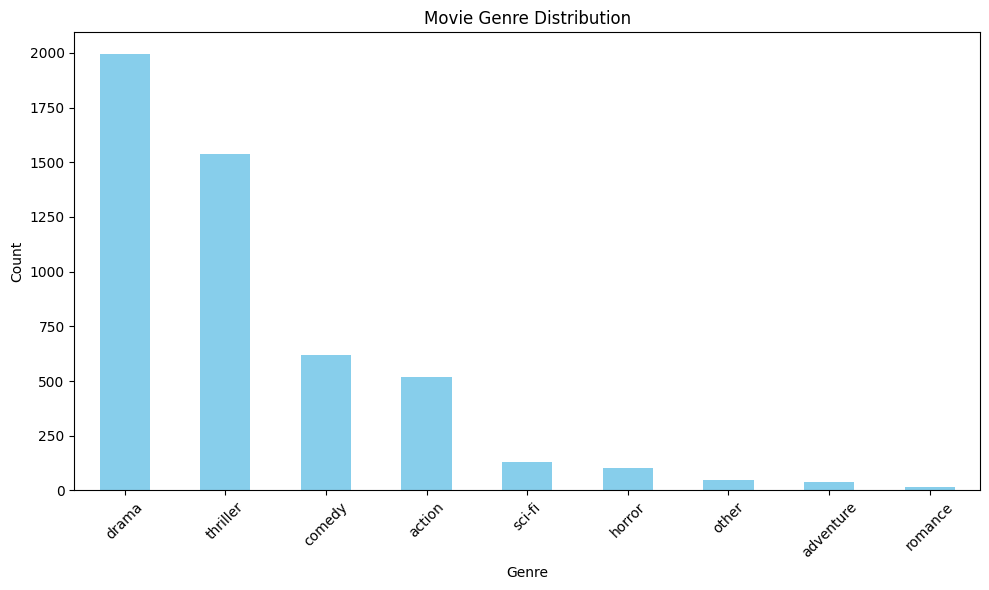

In [7]:

# 1. Genre distribution
plt.figure(figsize=(10,6))
df['genre'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Movie Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Conclution :-**

 - **Movie Genre Distribution (Bar Chart)**

 - This bar plot revealed that:

   - Drama and Thriller are the most frequent genres in the dataset, followed by Comedy and Action.

   - Genres like Romance, Adventure, and Other are relatively underrepresented.

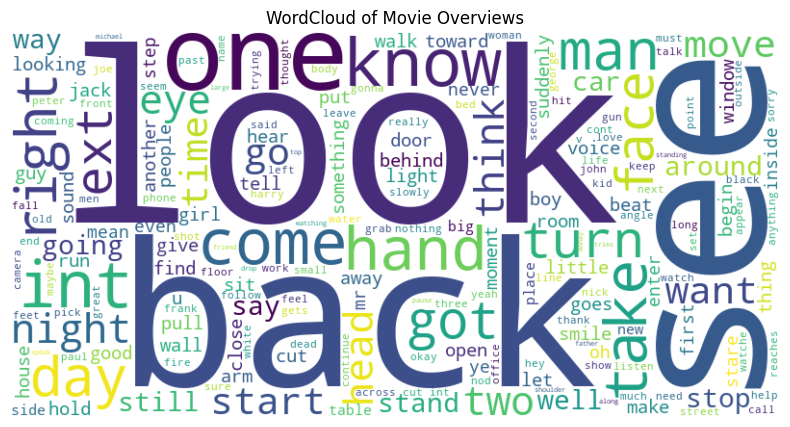

In [ ]:

# 2. WordCloud for all movie overviews
text = ' '.join(df['clean_overview'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Movie Overviews')
plt.show()


### **Conclution :-**

- **WordCloud of Movie Overviews**

- The WordCloud provided a visual summary of the most common words across all movie descriptions:

   - Dominant words like "look", "back", "face", "hand", and "time" reflect generic storytelling elements found in many genres.

   - Some screenplay-specific words such as "int", "ext", and "scene" also appear frequently, hinting that some descriptions may come from screenplays.

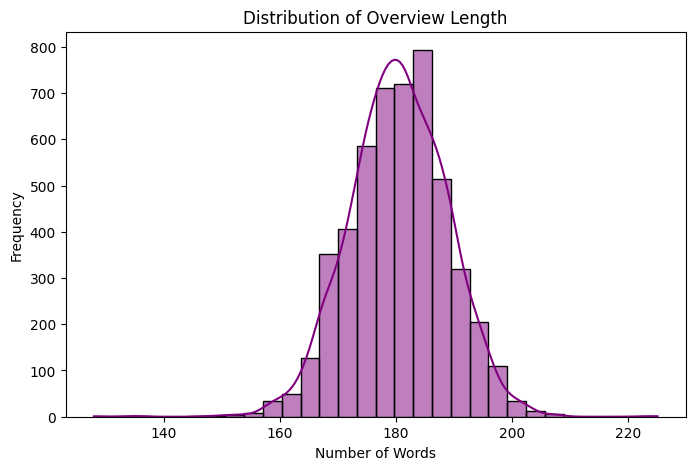

In [9]:

# 3. Length of overview
plt.figure(figsize=(8,5))
df['overview_length'] = df['text'].apply(lambda x: len(x.split()))
sns.histplot(df['overview_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Overview Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### **Conclution :-**

- **Distribution of Overview Length (Histogram with KDE)**

- This plot showed the distribution of text lengths (word counts) for the movie overviews:

   - The distribution is roughly bell-shaped, centered around 180 words.

   - Most descriptions fall between 160 to 200 words, indicating a consistent text length.

C:\Users\hp\AppData\Local\Temp\ipykernel_30120\1675171102.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


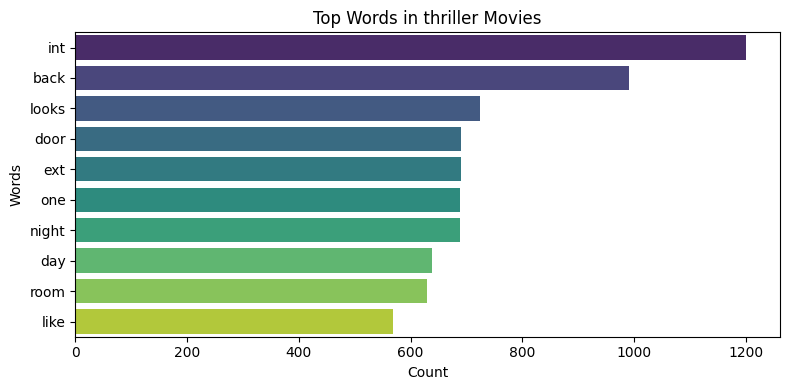

C:\Users\hp\AppData\Local\Temp\ipykernel_30120\1675171102.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


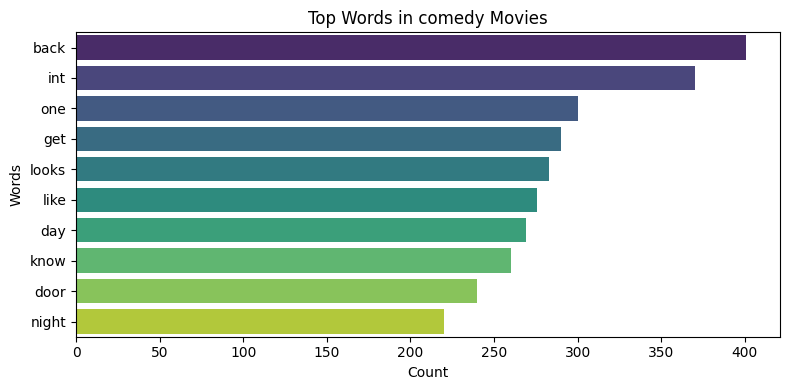

C:\Users\hp\AppData\Local\Temp\ipykernel_30120\1675171102.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


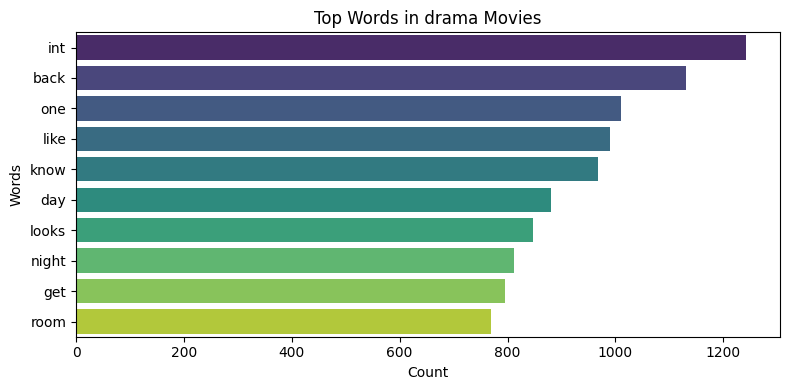

C:\Users\hp\AppData\Local\Temp\ipykernel_30120\1675171102.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


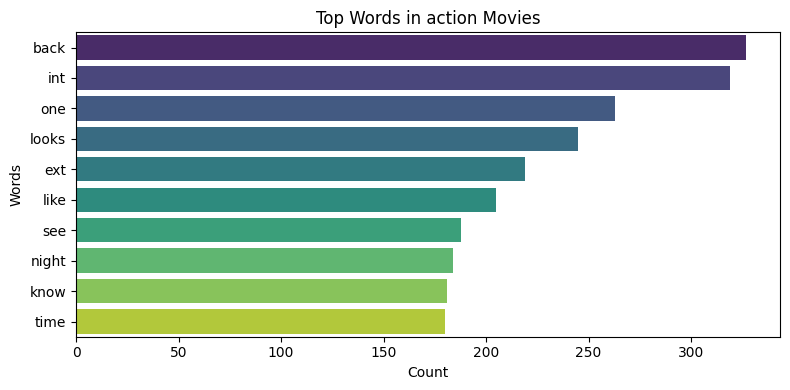

C:\Users\hp\AppData\Local\Temp\ipykernel_30120\1675171102.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


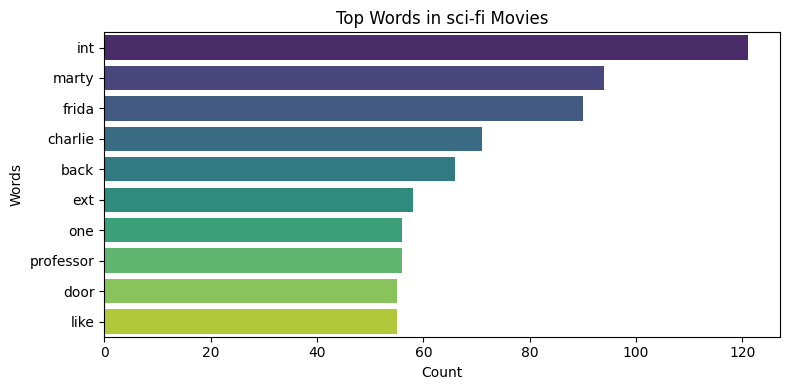

C:\Users\hp\AppData\Local\Temp\ipykernel_30120\1675171102.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


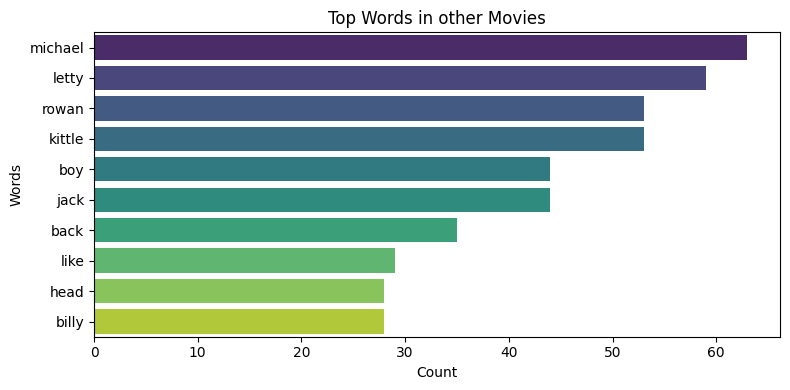

C:\Users\hp\AppData\Local\Temp\ipykernel_30120\1675171102.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


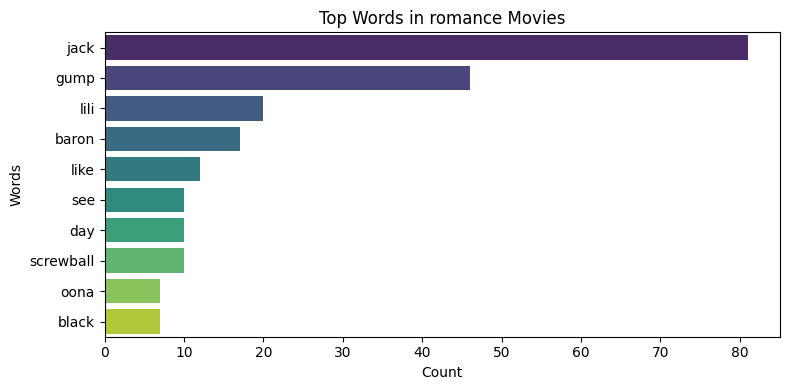

C:\Users\hp\AppData\Local\Temp\ipykernel_30120\1675171102.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


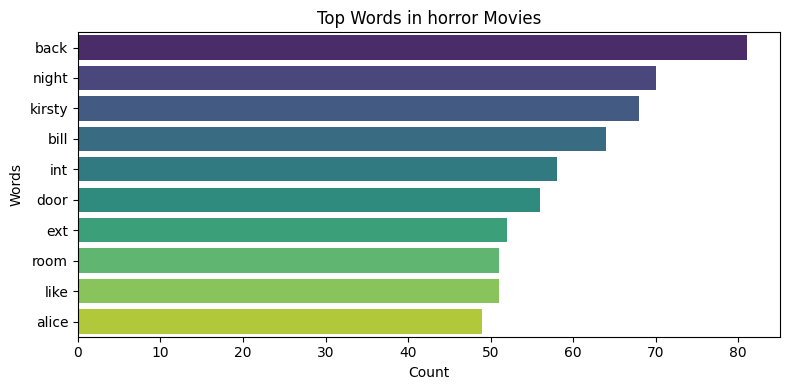

C:\Users\hp\AppData\Local\Temp\ipykernel_30120\1675171102.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


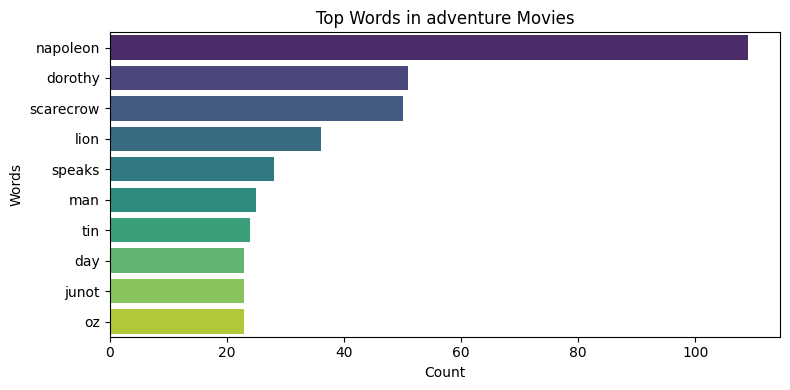

In [10]:

# 4. Top words per genre
from collections import Counter

def top_words_by_genre(df, genre):
    subset = df[df['genre'] == genre]['clean_overview']
    words = ' '.join(subset).split()
    return Counter(words).most_common(10)

for genre in df['genre'].unique():
    top_words = top_words_by_genre(df, genre)
    words, counts = zip(*top_words)
    plt.figure(figsize=(8,4))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f"Top Words in {genre} Movies")
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.tight_layout()
    plt.show()

Sure! Here's a simplified version of the conclusion using **easy and clear language** while keeping all the insights:

---

## ✅ **Conclusion (Simplified)**

---

### **1. Thriller Movies**
- **Common Words:** `int`, `back`, `looks`, `door`, `night`, `room`
- **Meaning:**
  - Many scenes happen **inside rooms** (like houses or buildings).
  - Words show **suspense, mystery, and danger**, especially at night.
  - Fits the **tense and serious** mood of thriller films.

---

### **2. Comedy Movies**
- **Common Words:** `back`, `int`, `one`, `get`, `like`
- **Meaning:**
  - Uses **simple, everyday words** – shows casual and funny conversations.
  - Many scenes happen indoors but in **fun, normal situations**.
  - Language is light, matching the **fun and relaxed** feeling of comedies.

---

### **3. Drama Movies**
- **Common Words:** `int`, `back`, `one`, `like`, `know`, `day`, `looks`, `night`, `get`, `room`
- **Meaning:**
  - A lot of **indoor scenes** – people talking and expressing emotions.
  - Words are about **feelings and daily life**, like "know", "like", and "get".
  - Shows that dramas focus on **personal stories and relationships**.

---

### **4. Action Movies**
- **Common Words:** `back`, `int`, `one`, `looks`, `ext`, `like`, `see`, `night`, `know`, `time`
- **Meaning:**
  - Mix of **indoor and outdoor scenes** – action happens everywhere.
  - Words show **movement**, **fighting**, and **fast decisions**.
  - Common in action-packed stories full of **chase and adventure**.

---

### **5. Sci-Fi Movies**
- **Common Words:** `int`, `marty`, `frida`, `charlie`, `back`, `ext`, `one`, `professor`, `door`, `like`
- **Meaning:**
  - Many unique character names like **Marty and Professor**.
  - Sci-fi often has **experiments, future tech, and strange places**.
  - Scenes are inside and outside, showing a **mix of worlds or dimensions**.

---

### **6. Other Movies**
- **Common Words:** `michael`, `letty`, `rowan`, `kittle`, `boy`, `jack`, `back`, `like`, `head`, `billy`
- **Meaning:**
  - Focus on **characters’ names**, showing stories about people.
  - Words suggest **personal events or biographies**.
  - “Other” means these movies didn’t fit neatly into one genre.

---

### **7. Romance Movies**
- **Common Words:** `jack`, `gump`, `lili`, `baron`, `like`, `see`, `day`, `screwball`, `oona`, `black`
- **Meaning:**
  - Character names are common – **love stories often focus on two people**.
  - Words like “like”, “see”, and “day” show **feelings, emotions, and relationships**.
  - Romantic films are about **connection and moments shared**.

---

### **8. Horror Movies**
- **Common Words:** `back`, `night`, `kirsty`, `bill`, `int`, `door`, `ext`, `room`, `like`, `alice`
- **Meaning:**
  - Many scenes happen at **night or inside scary rooms**.
  - Character names show **people in danger or fear**.
  - Words fit the **dark and scary mood** of horror movies.

---

### **9. Adventure Movies**
- **Common Words:** `napoleon`, `dorothy`, `scarecrow`, `lion`, `speaks`, `man`, `tin`, `day`, `junot`, `oz`
- **Meaning:**
  - Focus on **famous characters and magical places**.
  - Words show **journeys, talking characters, and special events**.
  - Adventure movies tell **big stories about travel and discovery**.

---

Would you like this saved as a **PDF** or added into your **Power BI report or presentation**?

C:\Users\hp\AppData\Local\Temp\ipykernel_30120\2883229107.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_scores[sorted_idx][:10], y=top_tfidf_words[sorted_idx][:10], palette='rocket')


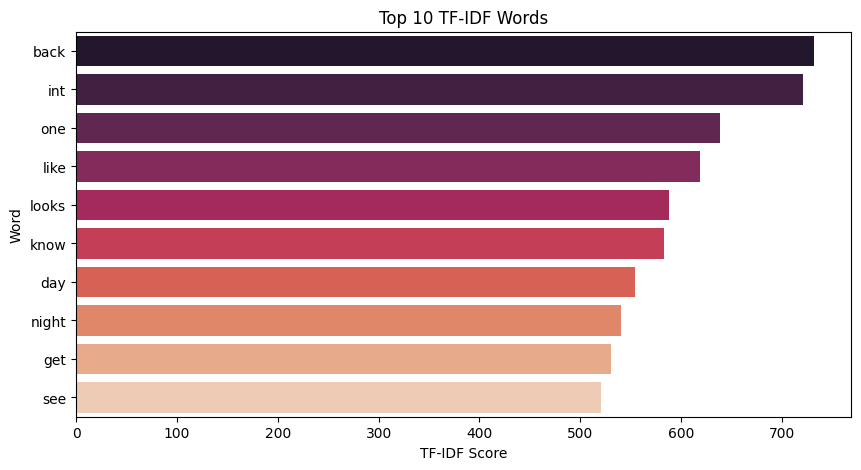

In [11]:

# 5. TF-IDF Word Importance
tfidf = TfidfVectorizer(max_features=20)
tfidf_matrix = tfidf.fit_transform(df['clean_overview'])
top_tfidf_words = tfidf.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
sorted_idx = np.argsort(tfidf_scores)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(x=tfidf_scores[sorted_idx][:10], y=top_tfidf_words[sorted_idx][:10], palette='rocket')
plt.title("Top 10 TF-IDF Words")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.show()

### **Conclution :-**

- Most informative words: back, int, one, like, day, night.
- These words help distinguish genres, showing their uniqueness across movie plots.

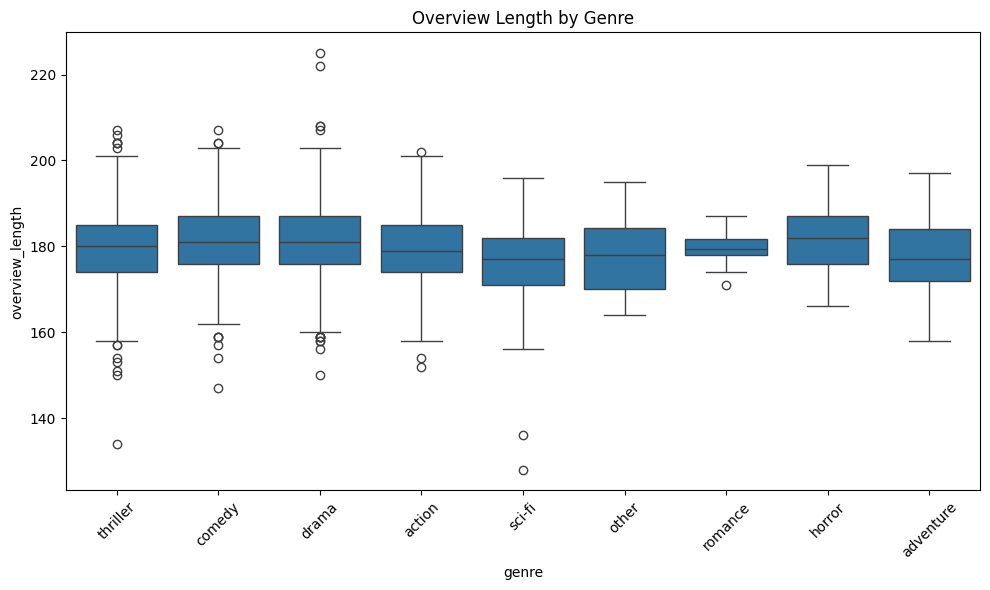

In [12]:

# 6. Genre vs Overview Length
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='genre', y='overview_length')
plt.title("Overview Length by Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Conclution :-**

**Overview Length by Genre**
- Overview lengths are generally similar across genres.
- Romance has slightly shorter overviews, while comedy, drama, and horror tend to be more descriptive.
- Outliers exist, but most overviews center around ~180 words.

### **5. Splitting the Dataset And Train Model**

In [13]:

X = df['clean_overview']
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression(max_iter=300))
])

In [15]:

pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf', LogisticRegression(max_iter=300))])

In [16]:

preds = pipeline.predict(X_test)
acc = accuracy_score(y_test, preds)
report = classification_report(y_test, preds)

g:\Final_Projects\NLP\Project2\myenv2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Final_Projects\NLP\Project2\myenv2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\Final_Projects\NLP\Project2\myenv2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **6. Model Accuracy**

In [17]:

print("Accuracy:", acc)
print("Classification Report:\n", report)

Accuracy: 0.764
Classification Report:
               precision    recall  f1-score   support

      action       0.93      0.55      0.69       118
   adventure       1.00      0.29      0.44         7
      comedy       0.94      0.55      0.70       110
       drama       0.71      0.90      0.79       396
      horror       0.00      0.00      0.00        18
       other       1.00      0.11      0.20         9
     romance       0.00      0.00      0.00         5
      sci-fi       0.83      0.25      0.38        20
    thriller       0.78      0.86      0.82       317

    accuracy                           0.76      1000
   macro avg       0.69      0.39      0.45      1000
weighted avg       0.77      0.76      0.74      1000



### **Conclution :-**

**Accuracy:** 76.4% — solid for a genre classification task.

**Best results for:**

  - Drama (F1-score: 0.79)

  - Thriller (F1-score: 0.82)

**Poor performance on:**

  - Horror, Romance, and Adventure due to low support and overlap with other genres.

  - F1-scores are 0.00 for some — indicating the model never predicted those genres correctly.



### **7. Save Model**

In [18]:

with open("genre_classifier.pkl", "wb") as file:
    pickle.dump(pipeline, file)